# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


have 105059 males in the lists

and 202448 females in the lists
 and
and 4 other people in the list
dict_keys(['males', 'females', 'others'])


<BarContainer object of 3 artists>

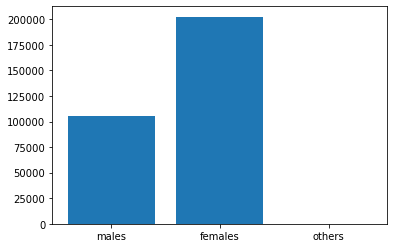

In [16]:
M_cnt = 0
F_cnt = 0
ots_cnt = 0
for i in range (len(app_train['CODE_GENDER'])):
    if app_train['CODE_GENDER'][i] == 'M':
        M_cnt += 1
    elif app_train['CODE_GENDER'][i] == 'F':
        F_cnt += 1
    else:
        ots_cnt += 1
print('have ' + f'{M_cnt} males in the lists\n')
print(f'and {F_cnt} females in the lists\n and')
print(f'and {ots_cnt} other people in the list')

data = {'males' : M_cnt, 'females' : F_cnt, 'others' : ots_cnt}
gender = list(data.keys())
values = list(data.values())
# print(data.keys())
fig, axs = plt.subplots()
axs.bar(gender, values)

<BarContainer object of 8 artists>

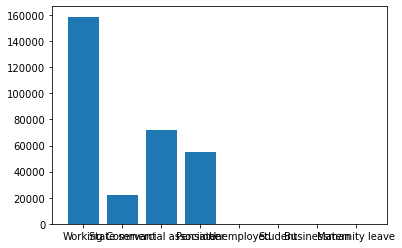

In [24]:
data = {}
# data_t = ()
# print(app_train['NAME_INCOME_TYPE'].unique())
# print(sum(app_train['NAME_INCOME_TYPE'][:] == 'Working'))
for i in app_train['NAME_INCOME_TYPE'].unique():
    data[i] = sum(app_train['NAME_INCOME_TYPE'][:] == i)
#     data_t+=(i,)
# print(data)
# print(data_t)
fig, axs = plt.subplots()
axs.bar(list(data.keys()),list(data.values()))

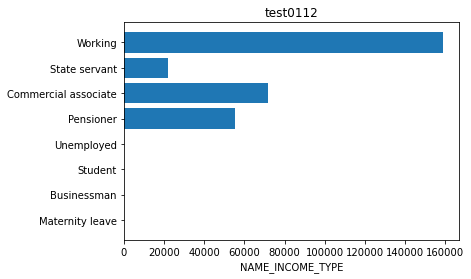

In [23]:
y_pos = np.arange(len(data_t)) # 產生 [0, 1, 2,...,6]
fig, axs = plt.subplots()
axs.barh(y_pos,list(data.values()), align='center')
axs.set_yticks(y_pos) # 標籤位置
axs.set_yticklabels(tuple(list(data.keys()))) # 標籤名稱
axs.invert_yaxis() # 倒轉 y 軸內容
axs.set_xlabel('NAME_INCOME_TYPE')
axs.set_title("test0112")
plt.show()

In [25]:
len(app_train)

307511

['51.632', '7.058', '23.289', '18.003', '0.007', '0.006', '0.003', '0.002']


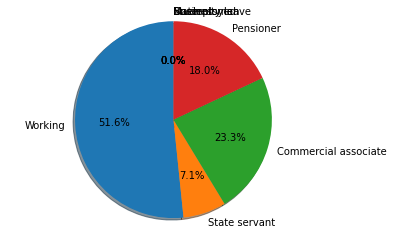

In [46]:
sizes = []
for i in list(data.values()):
    sizes.append('%.3f' % float(i/len(app_train)*100))     
print(sizes)
pie_fig, ax = plt.subplots()
ax.pie(sizes, labels=list(data.keys()), autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()